## This file is supposed to be run on your own device - simply if you want to get an idea of how the OpenCV functions work

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

### Reading Images

In [2]:
Image=cv.imread('Lizard_img.jpg')

In [3]:
cv.imshow('Lizard',Image)
cv.waitKey(0)         

#Notes
#waitkey must be typed to ensure file closes properly, without it the kernel will crash!

-1

In [11]:
## function for plotting images within ipynb using MatplotLib- Makes it convenient

def PlotImage(OpenCV_BGR_Image):
    RGB_Image = cv.cvtColor(OpenCV_BGR_Image,cv.COLOR_BGR2RGB)
    plt.imshow(RGB_Image)
    
    ls=list(RGB_Image.shape)
    if len(ls)>2:
        ls.remove(ls[-1])
    
    plt.title(f"Image - {ls}")
    plt.show()

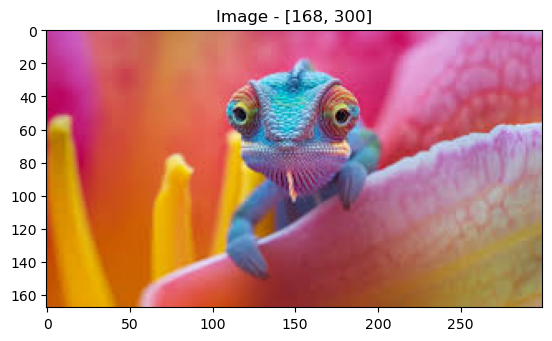

In [12]:
PlotImage(Image)

### Capturing Video

In [ ]:
vid=cv.VideoCapture(0)

while True:
    isTrue,frame = vid.read()          #Read frame as long there is one to read
    cv.imshow('Webcam feed',frame)    #Show the read frame, and The name of the tab is in ''
    
    if cv.waitKey(20) & 0xFF==ord('q'):  #assign keybind to a key of choice to stop executing video
        break

vid.release()
cv.destroyAllWindows()                #These 2 lines ensure video doesnt shutdown abruptly

#Notes
# IN case you get 215 Assertion error it means video is done executing and cannot find anymore frames to process

### Rescaling Images and per frame in a video

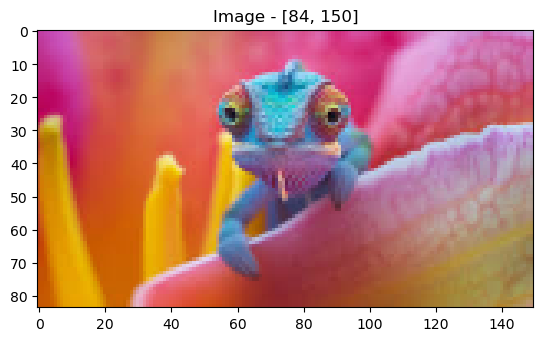

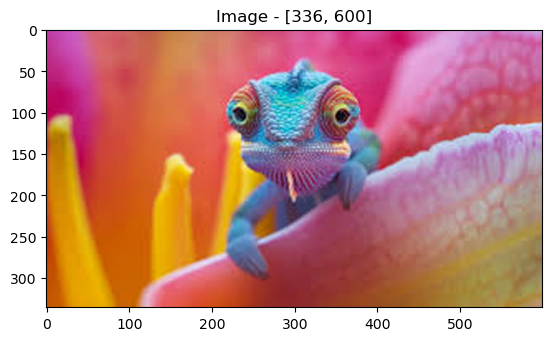

-1

In [14]:
def RescaleFrame(frame,scale=0.75):
    height=int(frame.shape[0]*scale)    #shape[0] is used for height/length
    width=int(frame.shape[1]*scale)     #shape[1] is used for width
    dimensions=(width,height)

    if scale<=1:
        return cv.resize(frame,dimensions,interpolation=cv.INTER_AREA)   ##Best suited for shrinking Ops

    if scale>1:
        return cv.resize(frame,dimensions,interpolation=cv.INTER_CUBIC)  ##Best suited for enlarging Ops

PlotImage(RescaleFrame(Image,0.5))
PlotImage(RescaleFrame(Image,2))

cv.waitKey(0)

In [15]:
#Rescale on live vid

vid=cv.VideoCapture(0)
    
while True:
    isTrue,frame = vid.read()          #Read frame as long there is one to read
    frame=RescaleFrame(frame)
    cv.imshow('Webcam feed',frame)    #Show the read frame, and The name of the tab is in ''
    
    if cv.waitKey(20) & 0xFF==ord('q'):  #assign keybind to a key of choice to stop executing video
        break

vid.release()
cv.destroyAllWindows()

### Drawing Shapes and Putting Text

In [16]:
import numpy as np

In [17]:
blank=np.zeros((500,500,3),dtype='uint8') #500 height, 500 width, 3 being shape of color channels

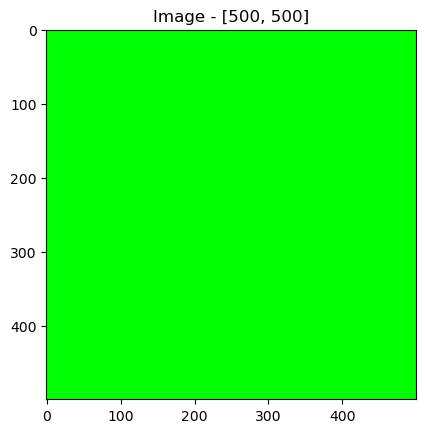

In [18]:
blank[:]=0,255,0
PlotImage(blank)

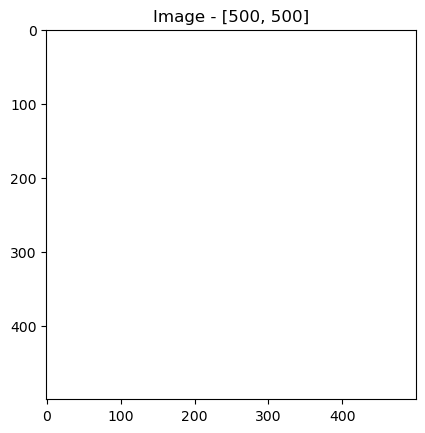

In [24]:
blank[:]=255,255,255
PlotImage(blank)

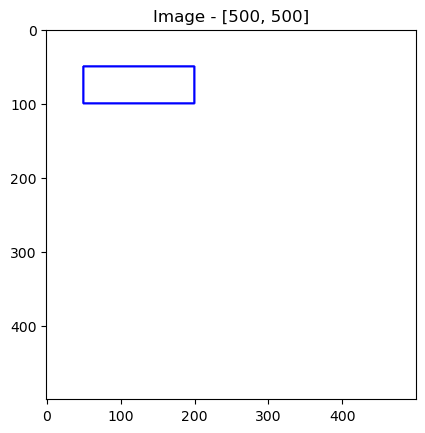

In [25]:
#Drawing a rectangle

cv.rectangle(blank,(50,50),(200,100),(255,0,0),thickness=2)  #(image,pt1,pt2,color,thickness)
PlotImage(blank)

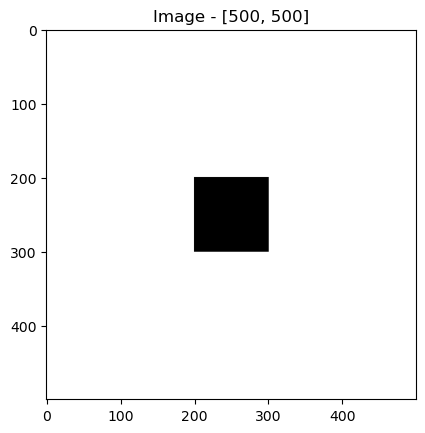

In [26]:
#Filling a rectangle

blank[:]=255,255,255 #Set blank to white color (BGR Color scheme)
cv.rectangle(blank,(200,300),(300,200),(0,0,0),thickness=cv.FILLED)
PlotImage(blank)

In [38]:
blank[:]=255,255,255

In [18]:
#Circle

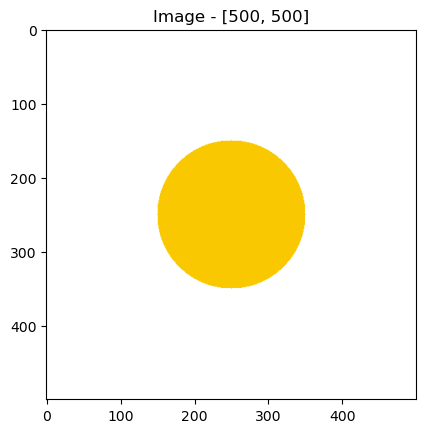

In [50]:
blank = cv.circle(blank,(250,250),100,(0,200,250),thickness=-1)
PlotImage(blank)

### Text

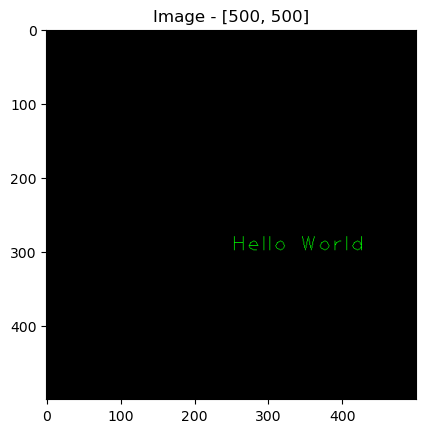

In [55]:
blank = cv.putText(blank,'Hello World',(250,300),cv.FONT_HERSHEY_PLAIN,2,(0,255,0),1)
PlotImage(blank)

blank[:]=0,0,0 #Testing multiple origin positions and this line of code resets the image back to black before testing

### Some important functions

Image before grayscale


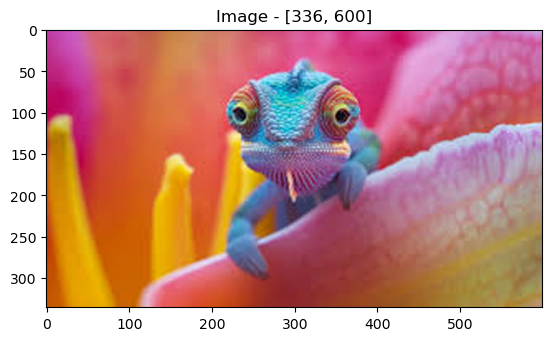



Image after GrayScale


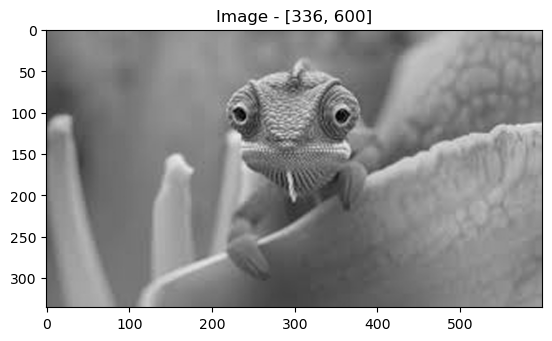

In [59]:
#Gray Scaler: Enables only to see intensity distribution of the image rather than colors

img=cv.imread('Lizard_img.jpg')

print('Image before grayscale')
PlotImage(Img_B)

Gray_Img_B=cv.cvtColor(Img_B,cv.COLOR_BGR2GRAY)
print("\n\nImage after GrayScale")
PlotImage(Gray_Img_B)